In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  7 20:29:51 2020

@author: Parth
"""
# =============================================================================
# 
# --> Types of Logistic Regression are:
#     a) Binomial Logistic Regression.
#     b) Multinomial Logistic Regression. (3+ categories without ordering)
#     c) Ordinal Logistic Regression. (3+ categories with ordering)
#     
# --> In Logistic Regression, the following steps are involved:
#     a) Predict a continuous outcome of probabilities by using normal linear regression equation. 
#     b) Convert the outcome betweeen 0 and 1. 
#     c) Use the equation to convert the continuous value's linear line into a sigmoid curve
#        predicting either 0 or 1. 
#       
# --> The above process requires three steps:
#     a) y=B0+B1x
#     b) p=1/(1+e^-y)
#     c) ln(p/1-p)=B0+B1x
#     
# =============================================================================


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

df0=pd.read_csv('Social_Network_Ads.csv')

df2=pd.get_dummies(df0['Gender'])

result = pd.concat([df0,df2],axis=1)
df=result.drop(['User ID','Gender'],axis=1)

y=df.iloc[:,2].values
df0=df.drop(['Purchased'],axis=1)


X=df0.iloc[:,[0,1]].values



X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)













print(df.head())

   Age  EstimatedSalary  Purchased  Female  Male
0   19            19000          0       0     1
1   35            20000          0       0     1
2   26            43000          0       1     0
3   27            57000          0       1     0
4   19            76000          0       0     1


In [3]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
y_predSir = classifier.predict_proba(X_test)

cm=confusion_matrix(y_test,y_pred)

precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
fscore=f1_score(y_test,y_pred)
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

print('Precision: {}'.format(precision))
print('Recall/Sensitivity: {}'.format(recall))
print('F1 score: {}'.format(fscore))
print('Specificity: {}'.format(specificity))

#K-fold cross validation part
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
print("Mean of accuracies:",accuracies.mean())
print("STD of accuracies:",accuracies.std())





Precision: 0.8571428571428571
Recall/Sensitivity: 0.6
F1 score: 0.7058823529411764
Specificity: 0.94
Mean of accuracies: 0.85
STD of accuracies: 0.0414578098794425


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


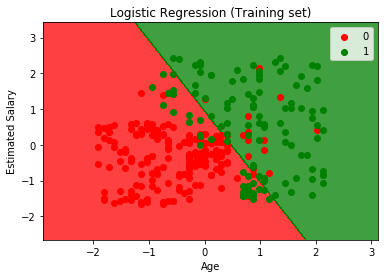

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


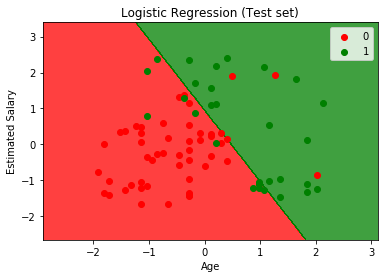

In [4]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()





from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

